In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Simulated loan dataset
data = pd.DataFrame({
    'ApplicantIncome': [5000, 3000, 4000, 6000, 2500, 7000, 2000, 6500, 3500, 8000],
    'CreditScore': [720, 680, 690, 740, 650, 750, 600, 730, 670, 760],
    'EmploymentStatus': ['Employed', 'Unemployed', 'Self-employed', 'Employed', 'Unemployed',
                         'Employed', 'Unemployed', 'Self-employed', 'Employed', 'Employed'],
    'LoanAmount': [200, 120, 150, 220, 100, 250, 80, 230, 130, 270],
    'Approved': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
})

In [ ]:
label_encoder = LabelEncoder()

data['EmploymentStatus'] = label_encoder.fit_transform(data['EmploymentStatus']) # Employed : 0, Self-employed : 1, Unemployed : 2
data['Approved'] = label_encoder.fit_transform(data['Approved']) # yes : 1, no : 0

In [7]:
data

,ApplicantIncome,CreditScore,EmploymentStatus,LoanAmount,Approved
0,5000,720,0,200,1
1,3000,680,2,120,0
2,4000,690,1,150,1
3,6000,740,0,220,1
4,2500,650,2,100,0
5,7000,750,0,250,1
6,2000,600,2,80,0
7,6500,730,1,230,1
8,3500,670,0,130,0
9,8000,760,0,270,1


In [17]:
data.corr()

,ApplicantIncome,CreditScore,EmploymentStatus,LoanAmount,Approved
ApplicantIncome,1.000000,0.944685,-0.734342,0.994054,0.836333
CreditScore,0.944685,1.000000,-0.748040,0.962177,0.836233
EmploymentStatus,-0.734342,-0.748040,1.000000,-0.755635,-0.655610
LoanAmount,0.994054,0.962177,-0.755635,1.000000,0.864426
Approved,0.836333,0.836233,-0.655610,0.864426,1.000000


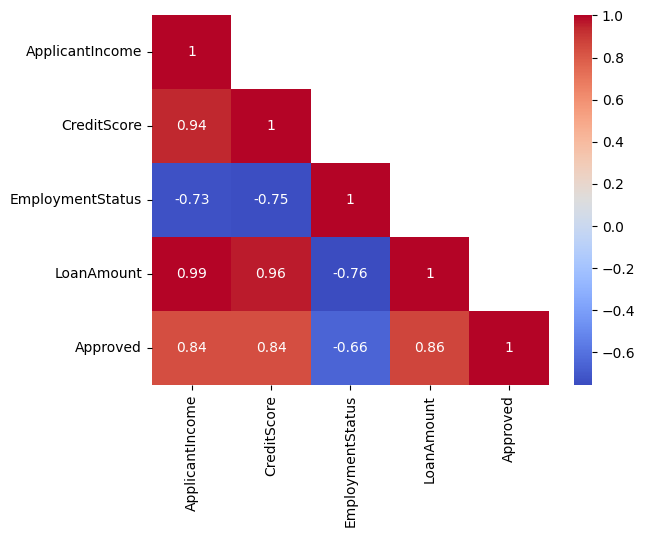

In [21]:
mask = np.triu(np.ones_like(data.corr()), k=1)
sns.heatmap(data.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.show()

In [8]:
X = data.drop('Approved', axis=1)
y = data['Approved']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)	

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred = model.predict(X_test_scaled)

In [16]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("Classification report : \n", classification_report(y_test, y_pred))

Accuracy score :  0.6666666666666666
Confusion matrix : 
 [[1 1]
 [0 1]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-validated accuracy: ", scores.mean())


Cross-validated accuracy:  0.8


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
